# Ten Night Observing Run

## aka, Wall & Jenkins 2.2

In [1]:
# imports
import numpy as np

import seaborn as sns
import pandas

from matplotlib import pyplot as plt

from astr234 import plotting

# Problem

## Imagine you are on a 10-night observing run and have one target that will benefit from the best possible conditions. Show that, if you wait for five nights and then choose the first night that is better than any of the five, you have a 37% chance of getting the best night of the 10.

### I will assume that the quality of night is a uniform distribution with values ranging from 0 (worst) to 1 (best)

# Init

In [2]:
ntrials = 100000

# Generate the 10 nights

In [3]:
nights = np.random.uniform(size=(ntrials, 10))
nights.shape

(100000, 10)

## Find the best in the first 5 

In [4]:
best_of_5 = np.max(nights[:,:5], axis=1)
best_of_5.shape

(100000,)

### Examine

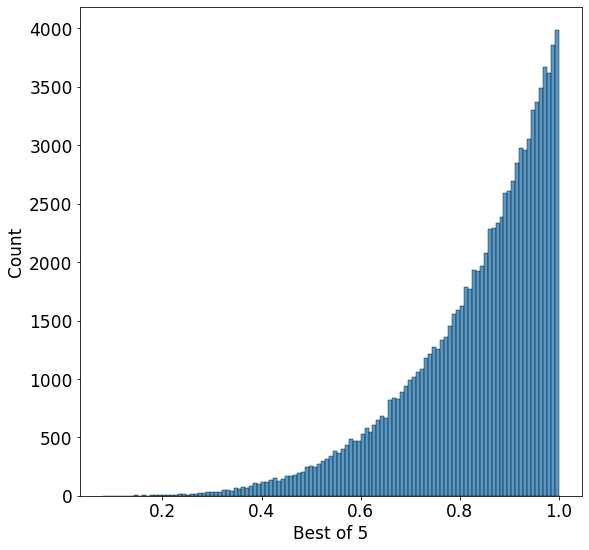

In [5]:
plt.figure(figsize=(9,9))
plt.clf()
ax = plt.gca()
sns.histplot(x=best_of_5, ax=ax)
#
ax.set_xlabel('Best of 5')
plotting.set_fontsize(ax, 17)

# Find nights better than the first

In [6]:
better = nights[:, 5:] > np.outer(best_of_5, np.ones(5))
better.shape

(100000, 5)

### Check

In [7]:
nbetter = np.sum(better, axis=1)
nbetter

array([2, 2, 2, ..., 0, 3, 0])

### Should happen 1/2 the time

In [8]:
np.sum(nbetter > 0) / ntrials

0.49655

# Evaluate

In [9]:
nbest = 0
for kk, row in enumerate(better):
    if np.any(row):
        take = np.min(np.where(row))
        #import pdb; pdb.set_trace()
        if nights[kk, take+5] >= np.max(nights[kk]):
            nbest += 1

In [10]:
nbest/ntrials

0.368